## 6.6 What does a bioreactor (fermenter) look like?


The rest of the course is about modelling fermenters. Before jumping into the math we need to know what it looks like. Industrial scale fermenters are basically just stainless steel vessels with lots of pipes going into and out of the vessel. Have a look at these pictures:

<img src="fermind.png" width="800" />


Fermenters can be massive. Some can hold as much as 400m$^3$ of liquid. These ‘containers’ can be longer than 10m and wider than 7m. For these big fermenters the top part will be accessed via a separate platform (see picture above). You may also wonder what it looks like on the inside. Have a look at these pictures.

<img src="ferminside.png" width="800" />

The impeller shaft and cooling coils are prominent. The Rushton impeller type (middle picture) is often employed for agitation. The vessel will also be outfitted with an air sparger at the bottom (if the fermentation requires air).

<img src="fermsmall.png" width="800" />

Pilot-scale and bench-scale fermenters are much smaller. Most fermentation research is performed in table top fermenters ranging from 0.5 to 10 liters. For these applications glass is used instead of stainless steel. The pictures above creates the image of a clear liquid in the fermenter. This is only because the pictures were obtained from bench-top fermenter advertisements. For most cases the fermentation liquid (broth) will be non-transparent, thick, soupy and likely very smelly.

<img src="fermsoup.jpg" width="200" />


The following diagrams highlights the important internals of a bioreactor:

<img src="fermdiagram.png" width="650" />

Note the important aspects:

*	Agitation equipment
*	Temperature, pH and dissolved oxygen sensors
*	Gas sparger (for small bubbles in the liquid)
*	Various ports for in or outflow of liquids/gasses
*	Temperature control jacket
*	Steam connectors for sterilization
*   Off-gas analysis equipment (not shown above)

All vessels, no matter the size, needs to be heat treated (sterilisation) prior to use. This is to kill all unwanted microbes beforehand. The initial liquid mixture that contains the dedicated microbe is referred to as the inoculum. The volume of the inoculum is typically small compared to that of the fermenter and growth will be required to fill the fermenter with a sufficient amount of the wanted microbe. 


## 6.7 The cmol balance

In CBI310 we’ll assume that all fermenters are well mixed and that no concentration or temperature gradients exist within the fermentation broth. In real life the assumption is often approximated where gradients are minimal. The easiest way to perform the mass balance over the fermenter is to consider the cmol balance of each component. We’ll start with a time-dependant model were the dynamic concentration and volume changes in the fermenter are incorporated by an accumulation term for each component ($\frac{dN_i}{dt}$). Note that the cmol quantity ($N_i$) is the product of the cmol concentration ($C_i$ in $\frac{cmol}{L}$) and the fermenter volume ($V$). The concentration of a component and/or volume will change with addition/removal of the component as well as formation/depletion of the component. The general cmol component balance is given by:

$$\frac{dN_i}{dt}=Q^F C^F_i-QC_i  + r^{'}_i C_X V $$  
-------------------
$$\left[\frac{cmol\,i}{h}\right]=
 \left[ \frac{cmol\,i}{L} \cdot \frac{L}{h} \right]
- \left[ \frac{cmol\,i}{L} \cdot \frac{L}{h} \right] + \left[ \frac{cmol\,i}{cmol\,X\cdot h} \cdot \frac{cmol\,X}{L} \cdot L \right] $$

** Check and understand the units of all the terms. All 4 terms should have the same units! **Note that the superscript $^F$ refers to a feed stream concentration ($C^F_i$) and the inlet volumetric flowrate ($Q^F$). Due to the perfect mixing the outlet concentration ($C_i$) will be the same as the concentration in the fermenter. **Very important** to note the units and sign convention of $r^{'}_i$ as discussed in part 1 of this chapter. Formation of a component is by definition a positive $r^{'}_i$. Depletion of an component should therefore be indicated by multiplying the 'formation' term with a (-1). **Note the cmol X basis for ($r^{'}_i$).** Understand why $r^{'}_i$ is multiplied with the total cmols of X in the fermenter for unit consistency, since:

$$N_X=C_X\cdot V$$

Apart from the set of cmol balances, we also need a volume balance. When making the assumption that al liquids have the same density (feed and effluent) the following simple equation results:

$$\frac{dV}{dt}=Q^F-Q$$

Note that there can likely be more than one liquid feed into the fermenter, while the liquid effluent will mostly be a single stream.

<img src="balance1.png" width="650" />
 


## 6.8 Example of a fermentation model

We’ll continue with the ethanol example of 6.5 since the stoichiometry and rate definitions are well established. We’ll start with a batch fermenter where there is no continuous feed streams into or out of the fermenter. The fermenter will initially be filled with growth medium that contains the substrate (glucose in this example), an over supply of a nitrogen source and other essential nutrients like vitamins and minerals. After filling up the fermenter with the growth medium, the inoculum will be added. The mixing in the fermenter will be instantaneous and the biomass concentration ($C_X$) of the inoculum will be diluted to the initial fermenter biomass concentration ($C_X^o$). This instant will present time zero ($t^o$). 

The yield coefficients (growth and maintenance) for this example has been determined in **section 6.5**. To recap:

#### Growth:

$$Gluc\to0.141X+0.042Gly+0.535Et+0.281CO_2+0.254\,ATP$$

#### Maintenance:

$$Gluc \to\frac{2}{3}Et+\frac{1}{3}CO_2+\frac{1}{3}\,ATP$$

The specific growth rate for _S.cerevisiae_ was given as $\mu=0.3 \frac{1}{h}$ and the maintenance ATP expenditure as $\theta=0.15 \frac{mol\,ATP}{cmol\,X\cdot h}$.

If you are not very comfortable with the numerical solution of multiple differential equations (DE's) via the function **odeint** please work through the notebook **DE basics** supplied as part of this chapter.

Let's define the process parameters and starting conditions:


In [1]:
from numpy import array
mu=0.3
theta=0.15
Yg=[1, 0.141, 0.042, 0.535, 0.281, 0.254] # [0 Gluc, 1 X, 2 Gly, 3 Et, 4 CO2, 5 ATP]
Ym=[1, 2/3, 1/3, 1/3]                     #[0 Gluc, 1 Et, 2 CO2, 3 ATP]
Qf=Q=Cxf=Csf=Cgf=Cef=0                    #For now it is a batch fermenter
Vo=1000                                   #1000 liter initial volume
Co=array([0.001, 4, 0, 0, 1])             #[X, Gluc, Gly, Et and Vo/Vo] at t=0 in cmol/L
No=Co*Vo                                  #total initial cmol in the fermenter and volume at the end (see below why)
mumax,thetamax, Km= 0.3,0.15,0.01

We'll only consider the components glucose, biomass, glycerol and ethanol in the model, although it will also be possible to include $CO_2$ and generated ATP. Let's rewrite some of the rate definitions:

$${r_{X}^{'}}=\mu$$

$${r_{S}^{'}}= Y_{XS}^{G}\cdot\mu+\theta\cdot Y_{ATP\,S}^{M}  $$


$${r_{P}^{'}}= Y_{XP}^{G}\cdot\mu+\theta\cdot Y_{ATP\,P}^{M} $$  


We can now define the respective rates ($r^{'}_{i}$) according to the equations above. At this stage the rates are only a function of the process parameters, but soon we'll show how the parameters are influenced by the concentrations in the fermenter, hence the concentration functionality.

In [2]:
def r_prime(C):
    Cx, Cs, Cg, Ce = C                                   # naming the concentrations that will influence the rates (later more) 
    return [mu,
            -((Yg[0]/Yg[1])*mu+(Ym[0]/Ym[3])*theta),     #depletion
            (Yg[2]/Yg[1])*mu,                            #Y ATP Gly is zero
            (Yg[3]/Yg[1])*mu+(Ym[1]/Ym[3])*theta]

Note the order of components in the function above. It is [X, Gluc, Gly, Et]. It is easy to call the rate function given known concentration values. Let's take arbitrary concentration values and see:

In [3]:
r_prime([1,10,5,4])

[0.3, -2.5776595744680852, 0.08936170212765958, 1.4382978723404258]

We can also just call the fourth element ($r_{Et}^{'}$)

In [4]:
r_prime([1,10,5,4])[3]

1.4382978723404258

The cmol balance can now be defined as a function. We'll call the rate components (r_prime) from the cmol balance function.  Note that the cmol balance has a fifth element representing the fermenter volume so the element order in this function is [X, Gluc, Gly, Et, V].

In [5]:
def dNdt_fun(N,t):
    Cx, Cs, Cg, Ce, V = N[0]/N[4],N[1]/N[4],N[2]/N[4],N[3]/N[4],N[4]  #calculating and naming concentration and volume 
    r=r_prime([Cx, Cs, Cg, Ce])
    
    return [Qf*Cxf-Q*Cx+(r[0])*Cx*V,
            Qf*Csf-Q*Cs+(r[1])*Cx*V,    
            Qf*Cgf-Q*Cg+(r[2])*Cx*V,                        
            Qf*Cef-Q*Ce+(r[3])*Cx*V,
            Qf-Q]   

Let's integrate to see what happens in the fermenter in 20 hours:

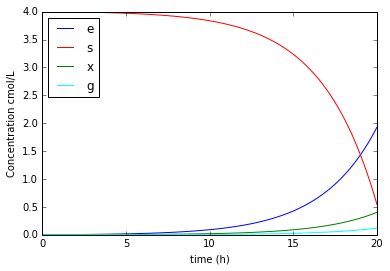

In [6]:
from numpy import linspace
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint 

tspan=linspace(0,20,100)             #define the timespan of the integration
N = odeint(dNdt_fun, No, tspan)

Cx=N[:,0]/N[:,4]                     #devide cmol amount by the volume to get concentration 
Cs=N[:,1]/N[:,4]
Cg=N[:,2]/N[:,4]
Ce=N[:,3]/N[:,4]

plt.plot(tspan, Ce, color='blue', label='e')
plt.plot(tspan, Cs, color='red',label='s')
plt.plot(tspan, Cx, color='green',label='x')
plt.plot(tspan, Cg, color='cyan',label='g')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (h)') 
plt.show()

The figure above shows how the concentration changes with time. The exponential curve is linked to the exponential increase in biomass (green curve). The 'catalyst' is increasing with time and accordingly also the volumetric rate of ethanol or biomass production. Note that the volumetric rate ($r_i$) is depicted by the slopes on the figure above and that can easily be calculated as:

$$r_i=r_{i}^{'}\cdot C_X$$
--------------
$$\left[\frac{cmol\,i}{L \cdot h} \right]=
\left[\frac{cmol\,i}{cmol\,X \cdot h} \right] \times
 \left[\frac{cmol\,X}{L}\right]$$

From the rate function you should gather that $r_{i}^{'}$ remains constant with time. This is not true for ($r_i$) since the biomass concentration increases with time.

Also have a look at final ethanol yield on glucose:

In [7]:
Yse=Ce[len(Ce)-1]/(Cs[0]-Cs[len(Cs)-1])  #final ethanol yield
Yse

0.55798596780850185

It is higher than the growth yield and lower than the maintenance yield. Does it correspond to the calculation in section 6.5? Does the yield vary as time progress?

Let's see what happens if we integrate for a longer period, say 22 hours:

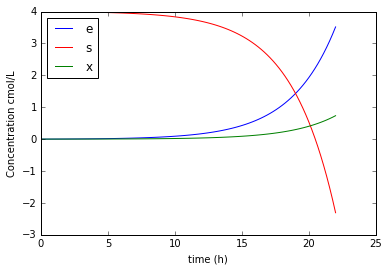

In [8]:
tspan=linspace(0,22,100)              #define the timespan of the integration
N = odeint(dNdt_fun, No, tspan)
Cx=N[:,0]/N[:,4]                      #devide cmol amount by the volume to get concentration 
Cs=N[:,1]/N[:,4]
Cg=N[:,2]/N[:,4]
Ce=N[:,3]/N[:,4]
plt.plot(tspan, Ce, color='blue',label='e')
plt.plot(tspan, Cs, color='red',label='s')
plt.plot(tspan, Cx, color='green',label='x')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (h)') 
plt.show()

Oopsy, there is suddenly negative glucose concentrations. This is because the rate function is not a function of the glucose concentration. Nothing slows down the rate as the substrate concentration decreases. This is not correct since products cannot be produced if there is no substrate. This 'substrate concentration effect' needs to be incorporated into the the rate model.

Fortunately we have a Nobel prize winner, [Jacques Monod](https://en.wikipedia.org/wiki/Monod_equation) who supplied the solution to this problem. The Monod equation slows down the growth rate only when the substrate concentration is low. We thus have our normal $\mu$ at high substrate concentrations (now referred to as $\mu_{max}$) and the mathematical handle (based on enzyme kinetic principles) to slow down the rate when $C_s$ gets low. The handle or functionality is given by:

$$\mu=\mu_{max}\left[\frac{Cs}{Km+Cs}\right]$$
---------
A plot of this function explains the effect of how the specific growth rate slows down with decreasing substrate concentration:

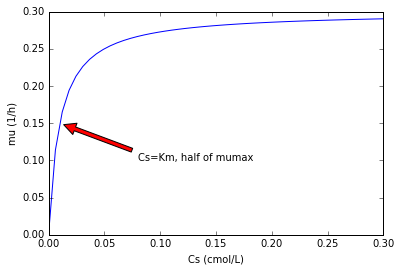

In [9]:
mumax=0.3 #1/h
Km=0.01   #cmol/L
Cs=linspace(0,0.3,50)
mu=mumax*Cs/(Km+Cs)
plt.plot(Cs,mu)
plt.ylabel('mu (1/h)') 
plt.xlabel('Cs (cmol/L)') 
plt.annotate('Cs=Km, half of mumax', xy=(0.01,0.15), xytext=(0.08,0.1), arrowprops=dict(facecolor='red', shrink=0.05),)
plt.show()

Very important to note that $K_m$ values are typically very small (typically 0.001 to 0.005 $\frac{cmol}{L}$). Thus the rate slowdown effect will only happen at very low substrate concentrations. We also use the Monod term to slow down the maintenance production rate as substrate is depleted. Let's include the Monod term in our rate expression for growth and maintenance. First we need to define the new parameters:

In [10]:
mumax,thetamax, Km=0.3,0.15,0.01

In [11]:
def r_prime(C):
    Cx, Cs, Cg, Ce = C                                # naming the concentrations that will influence the rates (later more) 
    mu=mumax*Cs/(Km+Cs)
    theta=thetamax*Cs/(Km+Cs)
    return [mu,
            -((Yg[0]/Yg[1])*mu+(Ym[0]/Ym[3])*theta),   #depletion
            (Yg[2]/Yg[1])*mu,                          #Y ATP Gly is zero
            (Yg[3]/Yg[1])*mu+(Ym[1]/Ym[3])*theta]

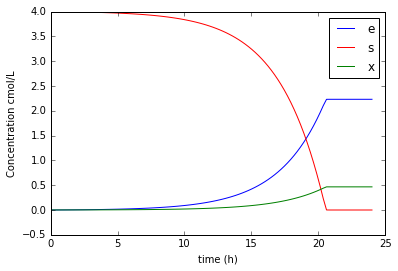

In [12]:
tspan=linspace(0,24,100)         #define the timespan of the integration
N = odeint(dNdt_fun, No, tspan)
Cx=N[:,0]/N[:,4]                 #devide cmol amount by the volume to get concentration 
Cs=N[:,1]/N[:,4]
Cg=N[:,2]/N[:,4]
Ce=N[:,3]/N[:,4]
plt.plot(tspan, Ce, color='blue',label='e')
plt.plot(tspan, Cs, color='red',label='s')
plt.plot(tspan, Cx, color='green',label='x')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (h)') 
plt.show()

The model is now closer to reality, where all production (and consumption) stops when glucose is depleted. It is very useful to calculate the respective rates as a function of time using the result from the integration (N).

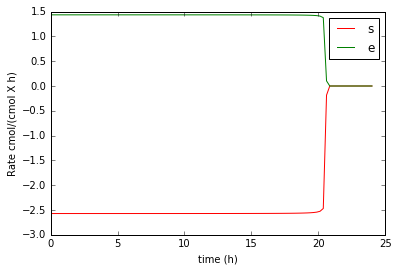

In [13]:
from numpy import asarray
Ci=(N[:, :4].T/N[:, 4]).T                  #first 4 elements of N devided by 5th element to get Ci, 
r=asarray([r_prime(C) for C in Ci])        # All Ci rows assigned (one by one) to function r_prime
                                                         
rs=r[:,1]
re=r[:,3]

plt.plot(tspan, rs, color='red',label='s')
plt.plot(tspan, re, color='green',label='e')
plt.legend(loc='best')
plt.ylabel('Rate cmol/(cmol X h)') 
plt.xlabel('time (h)') 
plt.show()


Note from the figure that the rates remain constant until the end where a rapid change occurs. This is due to the very small $K_m$ value. Enlarge the $K_m$ value with an order of magnitude and replot the rates. It is important that you understand the effect of the Monod term on the respective rates.

You may note that we have calculated the concentrations twice. See below: 

In [14]:
Cs-Ci[:,1]   #Both terms represent the glucose concentration

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

The volumetric reaction rates can also be calculated and plotted:

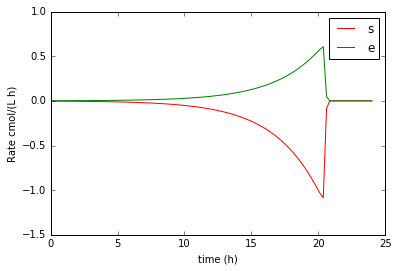

In [15]:
rs_vol=rs*Cx
re_vol=re*Cx

plt.plot(tspan, rs_vol, color='red',label='s')
plt.plot(tspan, re_vol, color='green',label='e')
plt.legend(loc='best')
plt.ylabel('Rate cmol/(L h)') 
plt.xlabel('time (h)') 
plt.show()

The ethanol rate increase is due to the increasing biomass with time, while the Monod term dictates the final collapse. The same applies (although negative rates) for glucose.

The model allows us to switch to fed-batch mode by adding a stream to the fermenter. There need to be space in the fermenter since the liquid volume will increase. Let's add a concentrated glucose stream to the fermenter and plot the combined response.  

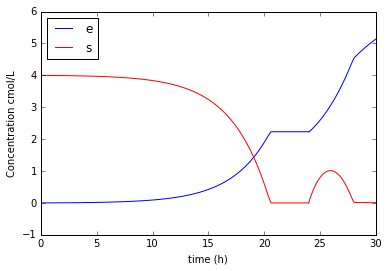

In [16]:
Qf=150   #L/h
Csf=15  #cmol/L

No2=N[len(N)-1,:]                   #end of previous run

tspan2=linspace(24,30,100)         #define the timespan of the integration
N2 = odeint(dNdt_fun, No2, tspan2)
Cx2=N2[:,0]/N2[:,4]                   #devide cmol amount by the volume to get concentration 
Cs2=N2[:,1]/N2[:,4]
Cg2=N2[:,2]/N2[:,4]
Ce2=N2[:,3]/N2[:,4]
plt.plot(tspan, Ce, color='blue',label='e')
plt.plot(tspan2, Ce2, color='blue')
plt.plot(tspan, Cs, color='red',label='s')
plt.legend(loc='best')
plt.plot(tspan2, Cs2, color='red',)
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (h)') 
plt.show()


What is happening here? Once glucose get added at 24h the ethanol production commences (we assume that the cells remain metabolically active eventhough they were without substrate for a few hours). Initially all the added glucose is not consumed instantaneously and accordingly there is an increase in the glucose concentration. More cells will however form and the volumetric glucose consumption rate will increase up to the point where the supply of new glucose via Qf limits the rate. For the last section (t>28h) the glucose supply is controlling the rate. Play around with additional plots to better understand this discussion.

Remember to check the volume increase since there need to be space in the fermenter. In this example we have almost doubled the volume after switching to fed-batch mode!

In [17]:
N2[len(N2)-1:,4]   #last volume element of N2

array([ 1900.])

Let's return to the batch section of the fermentation and compare our model to experimental data by using a higher initial concentration of glucose. 

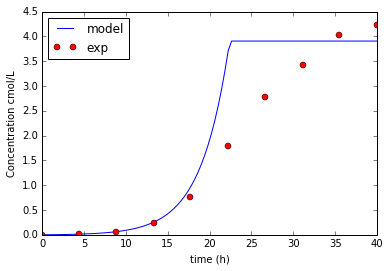

In [18]:
Qf=Csf=0                          #Batch mode again
Co=array([0.001, 7, 0, 0, 1])     #Increase the initial glucose concentration to 7 cmol/L
No=Co*Vo 
#Read in experimental data
Ce_e=array([ 0.,0.013,0.062,0.238,0.763, 1.783,2.78,3.42,4.03,4.23])
te_e=array([  0.,4.4,8.8,13.3,17.7,22.2,26.6,31.1,35.5, 40.])

tspan=linspace(0,40,100)         #timespan the same as the experimental data
N = odeint(dNdt_fun, No, tspan)
Cx=N[:,0]/N[:,4]                 #devide cmol amount by the volume to get concentration 
Cs=N[:,1]/N[:,4]
Cg=N[:,2]/N[:,4]
Ce=N[:,3]/N[:,4]
plt.plot(tspan, Ce, color='blue',label='model')
plt.plot(te_e, Ce_e, 'ro',label='exp')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (h)') 
plt.show()

From the plot it is clear that the ethanol production is not as fast as the model predicts (eventhough more ethanol is made in the experiment - more about this later). The slower ethanol production is because cell growth is inhibited by ethanol in the fermentation broth. It is commonly referred to as product inhibition. For ethanol the effect is linear up to a maximum tolerable ethanol concentration ($C_e^*$). The growth inhibition is incorporated into the specific growth rate as follows:

$$\mu=\mu_{max}\left[\frac{Cs}{Km+Cs}\right] \left[1-\frac{C_e}{C_e^*} \right]$$

Note that the last bracket represents the inhibition term and that it will be 1 when $C_e=0$ and zero when $C_e=C_e^*$.

Another common inhibition model is the following:

$$\mu=\mu_{max}\left[\frac{Cs}{Km+Cs}\right] \left[1+\frac{C_p}{K_p} \right]^{-1}$$

Where $K_p$ is a parameter. The product is not specified in the above formulation. For most cases only a single product will be inhibiting, but it is possible to have more than one inhibiting product. For these cases more inhibition terms will be added to the equation above.

It is easy to incorporate the ethanol inhibition term into the rate model:

In [19]:
def r_prime(C):
    Cx, Cs, Cg, Ce = C         # naming the concentrations that will influence the rates (later more) 
    mu=mumax*Cs/(Km+Cs)*(1-Ce/Cemax)
    theta=thetamax*Cs/(Km+Cs)
    if mu < 0:                 # there may be more ethanol production via maintenance, don't want negative mu's
        mu=0
    
    return [mu,
            -((Yg[0]/Yg[1])*mu+(Ym[0]/Ym[3])*theta),     #depletion
            (Yg[2]/Yg[1])*mu,                            #Y ATP Gly is zero
            (Yg[3]/Yg[1])*mu+(Ym[1]/Ym[3])*theta]

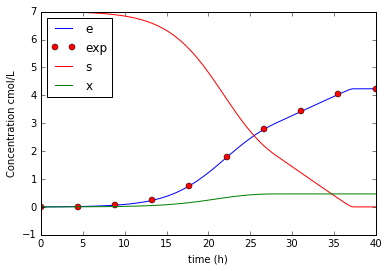

In [20]:
Cemax=3                          #cmol/L
tspan=linspace(0,40,100)         #timespan the same as the experimental data
N = odeint(dNdt_fun, No, tspan)
Cx=N[:,0]/N[:,4]                 #devide cmol amount by the volume to get concentration 
Cs=N[:,1]/N[:,4]
Cg=N[:,2]/N[:,4]
Ce=N[:,3]/N[:,4]
plt.plot(tspan, Ce, color='blue',label='e')
plt.plot(te_e, Ce_e, 'ro',label='exp')
plt.plot(tspan, Cs, color='red',label='s')
plt.plot(tspan, Cx, color='green',label='x')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (h)') 
plt.show()

There is a few observations to be made. From the biomass curve (green) it should be clear that growth terminates once $C_e$ reached $3\frac{cmol}{L}$. Why then does the ethanol production continue beyond $4\frac{cmol}{L}$? The answer lies in the maintenance production that is not inhibited by ethanol (no inhibition on $\theta$ except for the Monod term). Maintenance production rates can also be inhibited by metabolic products but not always in the same manner as growth. This leads to variations in the observed yields. Remember this equation:

$$Y_{SP}^{O}=\frac{r_{P}^{'}}{|r_{S}^{'}|}=
\frac{ Y_{XP}^{G}\cdot\mu+\theta\cdot Y_{ATP\,P}^{M}  }
{ |Y_{XS}^{G}|\cdot\mu+\theta\cdot Y_{ATP\,S}^{M} }
$$

If $\mu$ changes different to $\theta$ the observed yields or $z$ will change:

$$z=\frac{|Y_{XS}^{G}|\cdot\mu}{|Y_{XS}^{G}|\cdot\mu+\theta\cdot Y_{ATP\,S}^{M}}$$

Consider the ethanol yield as a function of time:

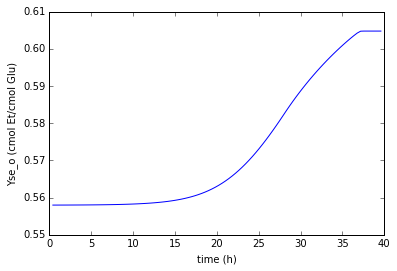

In [21]:
Cs_used=(Cs[0]-Cs)
Yse_o=Ce[1:99]/(Cs_used[1:99])              #don't want to devide by zero - first element
plt.plot(tspan[1:99], Yse_o, color='blue')

plt.ylabel('Yse_o (cmol Et/cmol Glu)') 
plt.xlabel('time (h)') 
plt.show()

From the stoichiometry calculations it should be clear that the yield should always be between 0.535 and 0.66 $\frac{cmol\, Et}{cmol\, Gluc}$. From the graph is clear that maintenance already has an effect at the start (z=0.83). As the growth is inhibited by ethanol in the broth and not the maintenance the $z$ fraction will decrease and the observed (or measured) yield will increase. You can plot $z$ against time. The higher product yield is a good thing, since more of the glucose carbon ends up in the targeted product.

The ethanol formation rate plotted against ethanol concentration is also helpful to understand what is happening. 

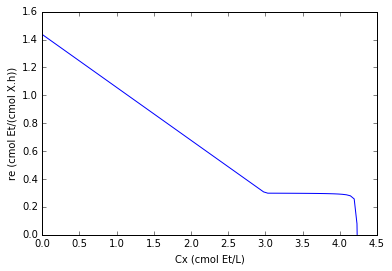

In [22]:
Ci=(N[:, :4].T/N[:, 4]).T                  #first 4 elements of N devided by 5th element to get Ci, 
r=asarray([r_prime(C) for C in Ci])        # All Ci rows assigned (one by one) to function r_prime
                                                         
rs=r[:,1]
re=r[:,3]

plt.plot(Ce,re, color='blue')
plt.ylabel('re (cmol Et/(cmol X.h))') 
plt.xlabel('Cx (cmol Et/L)') 
plt.show()

See the linear decreasing rate 'stacked' on a maintenance rate basis. The sudden drop at the end is the Monod term kicking in at the end of the run.

I hope you agree that Ipython notebooks are an useful tool for building integrated understanding!
---

<img src="all right.jpg" width="500" />